# Chapter 9: Unsupervised Learning Techniques

In [1]:
import numpy as np
import matplotlib.pyplot as plt

- **Clustering**:
    - Group similar instances together into *clusters*.

- **Anomoly detection**:
    - Learn what "normal" data looks like, and then use that to detect abnormal instances.

- **Density estimation**:
    - Estimating the *probability density function (PDF)* of the random process that generated the dataset.

## 9.1 Clustering

**Clustering** - The task of identifying similar instances and assigning them to *clusters*, or groups of similar instances.

Various applications of clustering:
- Customer segmentation
    - Cluster your customers based on their purchases and their activity on your website.
    - Understand who your customers are and their needs so you can adapt your products and marketing to each segment.
    - Useful in *recommender systems* to suggest content that others in the same cluster enjoyed.
    
- Data analysis
    - When you analyze a new dataset, it can be helpful to run a clustering algorithm, and then analyze each cluster separately.

- Dimensionality reduction technique
    - Once a dataset has been clustered, it's possible to measure each instance's affinity with each cluster.
    - **Affinity** is any measure of how well an instance fits into a cluster.
    - Each instance's feature vector can then be replaced with the vector of its cluster affinities.
    - If there are *k* clusters, then the vector will be *k*-dimensional.
    - The vector is typically much lower-dimensional than the original feature vector, but preserves enough information for further processing.

- Anomaly detection (also called outlier detection)
    - Any instance that has a low affinity to all the clusters is likely to be an anomaly.
    - Detect unusual behavior such as unusual number of request per second.
    - Particularly useful in detecting defects in manufactoring or fraud detection.

- Semi-supervised learning
    - If you only have a few labels, you can propagate the labels to all the instances in the same cluster.
    - Greatly improves the number of labels available for subsequent supervised learning algorithms, improving performance.

- Search engines
    - Some search engines let you search for images that are similar to a reference image.
    - Perform clustering and then return all the images from the same cluster.

- Segment an image
    - By clustering pixels according to their color and replacing each pixel's color with the mean color of its cluster, it's possible to reduce the number of different colors in the image.
    - Used in object detection and tracking systems.
    - Makes it easier to detect the contour of each object.

### 9.1.1 K-Means

The K-Means algorithm is a simple algorithm capable of clustering clearly defined "blobs" of instances.

> Note: See Figure 9-2 in book.

In [13]:
# FROM BOOK NOTEBOOK

from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [14]:
from sklearn.cluster import KMeans

In [15]:
k = 5
kmeans= KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

> Note: You have to specify the number of clusters *k* that the algorithm must find.

In context of clustering, an instance's *"label"* is the index of the cluster that this instance gets assigned to.

In [16]:
y_pred

array([4, 0, 1, ..., 3, 1, 0])

In [17]:
y_pred is kmeans.labels_

True

In [18]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

You can easily assign new instances to the cluster whose centroid is closest.

In [19]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 3, 3])

> Note: K-Means algorithm does not behave very well when the blobs have very different diameters because all it cares about when assigning an instance to a cluster is the distance to the centroid.

*Hard clustering* - Assigning each instance to a single cluster.  
*Soft clustering* - Give each instance a score per cluster.

In the `KMeans` class, `transform()` measures the distance from each instance to every centroid.

In [20]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 1.49439034, 2.9042344 , 2.88633901],
       [5.80730058, 2.80290755, 4.4759332 , 5.84739223, 5.84236351],
       [1.21475352, 3.29399768, 1.69136631, 0.29040966, 1.71086031],
       [0.72581411, 3.21806371, 1.54808703, 0.36159148, 1.21567622]])

First instance in `X_new` is located at a distance of:
- 2.81 from the 1st centroid
- 0.33 from the 2nd centroid
- 2.90 from the 3rd centroid
- 1.49 from the 4th centroid
- 2.89 from the 5th centroid

Transforming into a k-dimensional dataset can be a very efficient nonlinear dimensionality reduction technique.

#### 9.1.1.1 The K-Means algorithm

How does the algorithm work?

1. Start by placing the centroids randomly (eg. pick *k* instances at random and use their locations as centroids).
2. Label the instances.
3. Update the centroids.
4. Repeat steps 2 & 3 until centroids stop moving.

> Note: The algorithm is guaranteed to converge in a finite number of steps because the mean squared distance between the instances and their closest centroid can only go down at each step. It does not oscillate forever.

> Note: The computational complexity is generally linear with regard to number of instances *m*, number of clusters *k*, and number of dimensions *n*. Worst case is exponential with number of instances. But in practice, K-Means is generally one of the fastest *clustering* algorithms.

Although it is guaranteed to converge, it may not converge to the right solution (eg. may converge to a local optimum). Whether it does or not depends on the centroid initialization.

#### 9.1.1.2 Centroid initialization methods

If you happen to know approximately where the centroids should be, you can set the `init` hyperparamter to a NumPy array containing the list of centroids and set `n_init=1`.

In [21]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

Another solution is to run the algorithm multiple times with different random initializations and keep the best solution. The number of random initializations is controlled by `n_init` hyperparameter (default `=10`).

It uses a performance metric called the model's **inertia**, the mean squared distance between each instance and its closest centroid.

In [22]:
k = 5
kmeans= KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

kmeans.inertia_ # Used 1st example of kmeans, Figure 9-3 in book

211.59853725816828

In [23]:
kmeans.score(X)

-211.5985372581683

> Note: Negative because Scikit-Learn's "greater is better" rule:  
if a predictor is better than another, its `score()` method should return a greater score.

K-Means++ algorithm uses initialization step that tends to select centroids that are distant from one another.

1. Take one centroid $\mathbf{c}^{(1)}$, chosen uniformly at random from the dataset.
2. Take a new centroid $\mathbf{c}^{(i)}$, choosing an instance $\mathbf{x}^{(i)}$ with probability $ D(\mathbf{x}^{(i)})^2 / \sum_{j=1}^{m} D(\mathbf{x}^{(j)})^2$, where $ D(\mathbf{x}^{(i)})$ is the distance between the instance and closest centroid that was already chosen.  
This probability distribution ensures that instances farther away from already chosen centroids are much more likely to be selected as centroids.
3. Repeat the previous step until all k centroids have been chosen.

`KMeans` uses this method by default.

#### 9.1.1.3 Accelerated K-Means and mini-batch K-Means

Accelerated K-Means by avoiding many unnecessary distance calculations. It can be achieved by exploiting the triangle inequality (ie. a straight line is always the shortest distance between two points) and by keeping track of lower and upper bounds for distances between instances and centroids.

`KMeans` uses this method by default.

Mini-batch K-Means uses mini-batches, moving the centroids just slightly at each iteration, instead of using the full dataset at each iteration.

In [24]:
from sklearn.cluster import MiniBatchKMeans

In [25]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

> Note: Mini-batch K-Means algorithm trains much faster than regular K-Means algorithm, but its inertia is generally slightly worse, especially as the number of clusters increases. See Figure 9-6 in book.

#### 9.1.1.4 Finding the optimal number of clusters

The inertia is not a good performance metric when trying to choose *k* because it keeps getting lower as we increase *k*.

By plotting the inertia as a function of *k*, there is an "elbow" at k = 4, splitting the rapid drop and the slower decrease. So it would be an okay guess to pick 4 centroids, but isn't very precise.

> Note: See Figure 9-8 in book.

A more precise approach is to use the **silhouette score**, which is the mean *silhouette coefficient* (between -1 and +1) over all the instances. A coefficient:
- Close to +1 => Instance is well inside its own cluster and far from others.
- Close to 0 => Instance is close to a cluster boundary.
- Close to -1 => Instance may have been assigned to the wrong cluster.

In [26]:
from sklearn.metrics import silhouette_score

In [27]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

By plotting silhouette scores for different numbers of clusters, it provides much more information than the inertia plot. k = 4 is a very good choice, and k = 5 is good too - much better than k = 6 or 7.

An even better visualization called a **silhouette diagram** is a plot of every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient.

The dashed line indicates the mean silhouette coefficient. We want most instances to be to the right as if it falls to the left, it means they are too close to other clusters. When k = 3 and k = 6, we get bad clusters. 

When k = 4, the cluster at index 1 is fairly big, so picking k = 5 may be a better idea to get clusters of similar sizes.

> Note: See Figure 9-10 in book.

### 9.1.2 Limits of K-Means

As mentioned already, K-Means isn't perfect.

- Needs to run several times to avoid suboptimal solution
- Need to specify number of clusters
- Does not perform well on clusters of varying sizes, densities, or nonspherical shapes

> Note: It is important to scale the input features before running K-Means, or the clusters may be very stretched and K-Means will perform poorly.

### 9.1.3 Using Clustering for Image Segmentation

**Image segmentation** - The task of partitioning an image into multiple segments.  

**Semantic segmentation** - All pixels that are part of the same object type get assigned to the same segment. (eg. 1 segment for all pedestrians)  

**Instance segmentation** - All pixels that are part of the same individual object are assigned to the same segment. (eg. different segment for each pedestrian)

**Color segmentation** - All pixels that have a similar color are assigned to the same segment.

In [28]:
from matplotlib.image import imread

In [29]:
image = imread("Images/Unsupervised_learning/ladybug.png")
image.shape

(533, 800, 3)

The image is represented as a 3D array.
- 1st dimension's size = Height
- 2nd dimension's size = Width
- 3rd dimension's size = Number of color channels (RGB)

=> For each pixel, there is a 3D vector containing the intensities of red, green, and blue, each between 0.0 and 1.0.

In [31]:
X = image.reshape(-1, 3) # Reshape array to long list of RBG colors
kmeans = KMeans(n_clusters=8).fit(X) # Clusters these colors using K-Means
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

K-Means prefers clusters of similar sizes. The ladybug is small - much smaller than the rest of the image - so even though its color is flashy, K-Means fails to dedicate a cluster to it.

> Note: See Figure 9-12 in book for ladybug reference.

### 9.1.4 Using Clustering for Preprocessing

Clustering can be an efficient approach to dimensionality reduction.

In [34]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [38]:
X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

log_reg.score(X_test, y_test)

0.9688888888888889

Now try using K-means as a preprocessing step. Create a pipeline that will first cluster the training set into 50 clusters and replace the images with their distances to these 50 clusters, then apply Logisitic Regression model.

In [39]:
from sklearn.pipeline import Pipeline

In [53]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50)),
    ("log_reg", LogisticRegression())
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression())])

> Note: Since there are 10 different digits, it's tempting to set the number of clusters to 10. However, each digit can be written several different ways, so it is preferable to use a larger number of clusters, such as 50.

In [54]:
pipeline.score(X_test, y_test)

0.9622222222222222

Since K-Means is used as a preprocessing step before classification, it's easy to find the best value of *k* by using `GridSearchCV`.

In [55]:
from sklearn.model_selection import GridSearchCV

In [57]:
param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

grid_clf.best_params_

D ..............................kmeans__n_clusters=17; total time=   0.2s
[CV] END ..............................kmeans__n_clusters=18; total time=   0.2s
[CV] END ..............................kmeans__n_clusters=18; total time=   0.2s
[CV] END ..............................kmeans__n_clusters=18; total time=   0.3s
[CV] END ..............................kmeans__n_clusters=19; total time=   0.2s
[CV] END ..............................kmeans__n_clusters=19; total time=   0.3s
[CV] END ..............................kmeans__n_clusters=19; total time=   0.2s
[CV] END ..............................kmeans__n_clusters=20; total time=   0.2s
[CV] END ..............................kmeans__n_clusters=20; total time=   0.2s
[CV] END ..............................kmeans__n_clusters=20; total time=   0.3s
[CV] END ..............................kmeans__n_clusters=21; total time=   0.3s
[CV] END ..............................kmeans__n_clusters=21; total time=   0.3s
[CV] END ..........................

{'kmeans__n_clusters': 97}

In [58]:
grid_clf.score(X_test, y_test)

0.9644444444444444

### 9.1.5 Using Clustering for Semi-Supervised Learning

Clustering can also be used in semi-supervised learning, when there's plenty of unlabeled instances and few labeled instances.

In [62]:
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

log_reg.score(X_test, y_test)

0.7555555555555555

Much worse than before but expected since this only trained on a small part (not full) of the training set. To do better, first cluster the training set into 50 clusters. Then for each cluster, find the image closest to the centroid and call them **representative images**.

In [63]:
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digits_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digits_idx]

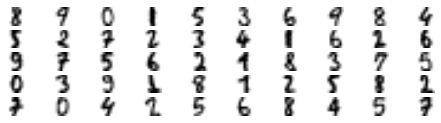

In [69]:
# FROM BOOK NOTEBOOK

plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [70]:
# Label each image
y_representative_digits = np.array([
    8, 9, 0, 1, 5, 3, 6, 9, 8, 4,
    5, 2, 7, 2, 3, 4, 1, 6, 1, 6,
    9, 7, 5, 6, 2, 1, 8, 3, 7, 5,
    0, 3, 9, 1, 8, 1, 2, 5, 8, 2,
    7, 0, 4, 1, 5, 6, 8, 4, 5, 7])

In [71]:
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8844444444444445

**Label propagation** - Propagate the labels to all the other instances in the same cluster.

In [72]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.9066666666666666

We propagated the label to all instances in cluster even ones near boundary which are probably mislabeled. Let's only propagate the labels to 20% of the instances that are closest to the centroids.

In [73]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

log_reg = LogisticRegression()
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.88

In [74]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9385665529010239

> #### Active Learning

> Next step is active learning, which is when a human expert interacts with the learning algorithm, providing labels for specific instances when the algorithm requests them.

> 1. The model is trained on the labeled instances gathered so far, and this model is used to make predictions on all the unlabeled instances.
> 2. The instances for which the model is most uncertain (eg. estimated probability is lowest) are given to the expert to be labeled.
> 3. Iterate this process until performance improvements stops being worth the labeling effort.

### 9.1.6 DBSCAN

DBSCAN defines clusters as continuous regions of high density.
- For each instance, the algorithm counts how many instances are located within a small distance $\epsilon$ from it called the instance's **$\epsilon$-neighborhood**.

- If an instance has at least `min_samples` in its $\epsilon$-neighborhood, then it's considered a core instance. Core instances are those that are located in dense regions.

- All instances in the neighborhood of a core instance belong to the same cluster and may include other core instances; therefore, a long sequence of neighboring core instances forms a single cluster.

- Any instance not a core instance and does not have one in its neighborhood is considered an anomaly.

> Note: This algorithm works well if all clusters are dense enough and if they are well separated by low-density regions.

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [14]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

dbscan.labels_

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5,  2,  3,  0,  2,  2,  2,  4,
        2,  2,  4,  0,  5,  1,  0,  5,  5,  3,  2,  2,  2,  4,  5,  0,  6,
        1, -1,  0,  0,  2,  3, -1,  3,  4, -1,  4,  4,  2,  0,  6,  2,  0,
        2,  4,  0,  3,  3,  0,  3,  5,  2, -1,  3,  0,  5,  0,  0,  0,  2,
        3,  0,  3,  6,  0,  2,  4,  4,  0,  3,  0,  4,  0,  3, -1,  3,  4,
        0, -1,  2,  2,  4,  1,  6,  0,  5,  2,  6,  2,  3,  3, -1,  2, -1,
        2,  4,  0,  0,  0,  2,  5,  2,  0,  2, -1,  2,  3,  1,  5,  2,  0,
        4,  2,  1,  2,  4,  4,  0,  0,  6,  2,  2,  0,  2, -1,  2,  0,  3,
        3,  5, -1,  3,  3,  5,  2,  4,  2,  2,  2,  4,  2,  4,  0, -1,  2,
        1,  2,  6,  4,  2,  3,  2, -1,  2,  0,  0,  2,  0,  4,  0,  4,  4,
        1,  6,  3,  2,  6,  1,  4,  4,  2,  0,  6,  0,  1,  0,  2,  5,  1,
        1,  2,  2,  2,  2,  0,  5,  5,  1,  4,  5,  0,  3,  3,  0,  0,  0,
        2,  0,  5,  2, -1,  2,  3,  5,  2,  2,  0,  4,  0,  4,  2,  2,  4,
        2,  2,  3,  2,  3

Instances that have an index of -1 are considered anomalies.

In [15]:
len(dbscan.core_sample_indices_)

808

In [16]:
dbscan.core_sample_indices_

array([  0,   4,   5,   6,   7,   8,  10,  11,  12,  13,  14,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  28,  29,  30,  31,
        32,  33,  34,  36,  38,  39,  41,  42,  44,  45,  47,  49,  50,
        51,  52,  53,  54,  55,  56,  58,  59,  61,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  83,  84,  85,  87,  88,  89,  90,  91,  93,  94,  96,
        97,  98, 102, 103, 104, 105, 106, 107, 108, 109, 110, 113, 114,
       115, 116, 117, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 135, 136, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149,
       150, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 172, 173, 174, 175, 176, 177, 178,
       179, 181, 182, 183, 185, 186, 187, 188, 189, 191, 193, 194, 195,
       196, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210,
       211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 222, 22

In [17]:
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

DBSCAN cannot predict which cluster a new instance belongs to. Instead it's better off using a different algorithm.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([6, 0, 3, 2], dtype=int64)

In [20]:
knn.predict_proba(X_new)

array([[0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.76],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.3 , 0.7 , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ]])

There are no anomaly in the training set, so the classifier always chooses a cluster, even when the cluster is far away. To introduce a maximum distance, use `kneighbors()` of `KNeighborsClassifer`.

In [21]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  3, -1], dtype=int64)

> Note: DBSCAN is simple yet powerful algorithm, but if the density varies significantly across the clusters, it can be impossible for it to capture all the clusters properly.

Computational complexity is $ O(m\log{m}) $ but Scikit-Learn can require up to $O(m^2)$ memory if `eps` is large.

### 9.1.7 Other Clustering Algorithms

**Agglomerative clustering**:
- A hierarchy of clusters is built from the bottom up.
- Think of tiny bubbles gradually attaching to each other until there's one big group of bubbles.
- Binary tree of clusters, where the leaves are individual instances.
- Must provide connectivity matrix, a sparse $ m \times n$ matrix that indicates which pairs of instances are neighbors.
- Does not scale well with large datasets without connectivity matrix.

**BIRCH**:
- Balanced Iterative Reducing and Clustering using Hierarchies
- Designed specifically for very large datasets.
- Faster than batch K-Means if features < 20.
- Builds a tree structure containing enough information to quickly assign each new instance to a cluster, without having to store all instances in the tree.

**Mean-Shift**:
- Places a circle centered on each instance.
- For each circle, computes the mean of all instances located within it.
- Shifts circle to be centered on the mean.
- Iterate until circles stop moving.
- All instances whose circles settled in same place are assigned to same cluster.
- Computational complexity if $O(m^2)$.
- Not suited for large datasets.

**Affinity propagation**:
- Voting system, where instances vote for similar instances to be their representatives.
- Once it converges, each representative and its voters form a cluster.
- Computational complexity if $O(m^2)$.
- Not suited for large datasets.

**Spectral clustering**:
- Takes a similarity matrix between the instances and creates a lower-dimensional embedding from it (ie. reduces its dimensionality).
- Then uses another clustering algorithm in the low-dimensional space (Scikit-Learn uses K-Means).
- Does not scale well to large numbers of instances.
- Does not behave well when clusters have very different sizes.

## 9.2 Gaussian Mixtures

A **Gaussian mixture model (GMM)** is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown. All instances generated from a single Gaussian distribution form a cluster that looks like an ellipsoid.

> Note: Read book on how to interpret Figure 9-16. A graphical representation of Gaussian mixture model.

Given a dataset $\mathbf{X}$, you typically want to start by estimating the weights $\mathbf{\Phi}$ and all the distribution parameters ($\mathbf{\mu}^{(1)} - \mathbf{\mu}^{(m)}$ and $\mathbf{\Sigma}^{(1)} - \mathbf{\Sigma}^{(m)}$).

In [4]:
# FROM BOOK NOTEBOOK

from sklearn.datasets import make_blobs

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [2]:
from sklearn.mixture import GaussianMixture

In [7]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

gm.weights_

array([0.39025715, 0.40007391, 0.20966893])

In [8]:
gm.means_

array([[ 0.05131611,  0.07521837],
       [-1.40763156,  1.42708225],
       [ 3.39893794,  1.05928897]])

In [9]:
gm.covariances_

array([[[ 0.68799922,  0.79606357],
        [ 0.79606357,  1.21236106]],

       [[ 0.63479409,  0.72970799],
        [ 0.72970799,  1.1610351 ]],

       [[ 1.14833585, -0.03256179],
        [-0.03256179,  0.95490931]]])

The algorithm finds the means and covariance matrices by using **Expectation Maximization (EM)** algorithm. Like K-Means, it also initializes the cluster parameters randomly, then repeats two steps until convergence:

1. **Expectation step** - Assigns instances to clusters.
2. **Maximization step** - Updates the clusters.

It is a more general form of K-Means as it finds cluster centers $\mathbf{\mu}^{(1)} - \mathbf{\mu}^{(m)}$, their size, shape, and orientation $\mathbf{\Sigma}^{(1)} - \mathbf{\Sigma}^{(m)}$, as well as relative weights $\phi^{(1)} - \phi^{(m)}$, but uses soft cluster assignments instead of hard.

> Note: Just like K-Means, EM can end up converging to poor solutions, so it needs to be run several times and keeping only the best solution.

In [10]:
gm.converged_

True

In [11]:
gm.n_iter_

4

In [12]:
gm.predict(X)

array([0, 0, 1, ..., 2, 2, 2], dtype=int64)

In [13]:
gm.predict_proba(X)

array([[9.76741808e-01, 6.78581203e-07, 2.32575136e-02],
       [9.82832955e-01, 6.76173663e-04, 1.64908714e-02],
       [7.46494398e-05, 9.99923327e-01, 2.02398402e-06],
       ...,
       [4.26050456e-07, 2.15512941e-26, 9.99999574e-01],
       [5.04987704e-16, 1.48083217e-41, 1.00000000e+00],
       [2.24602826e-15, 8.11457779e-41, 1.00000000e+00]])

A Gaussian mixture model is a **generative model**, meaning you can sample new instances from it and are ordered by cluster index.

In [14]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.86944074, -0.32767626],
       [ 0.29836051,  0.28297011],
       [-2.8014927 , -0.09047309],
       [ 3.98203732,  1.49951491],
       [ 3.81677148,  0.53095244],
       [ 2.84104923, -0.73858639]])

In [15]:
y_new

array([0, 0, 1, 2, 2, 2])

It can also estimate the density of the model at any given location with `score_samples()`, which estimates the log of the **probability density function (PDF)** at that location for each instance.  
=> The greater the score, the higher the density.

In [16]:
gm.score_samples(X)

array([-2.60768954, -3.57110232, -3.32987086, ..., -3.51347241,
       -4.39798588, -3.80746532])

> Recall: PDFs are probability **densities**. They determine where the probabilities would fall (ie. if there's a high PDF value at x = 1, most of the "die rolls" will occur at x = 1). 

> Note: We don't know what the rolls are, just that they'll be rolled more often at x = 1. To determine the CDF, the actual probability of a random variable, integrate the PDF.

When there are many dimensions, EM can struggle to converge to the optimal solution. You might need to limit the number of parameters it has to learn. You can limit the range of shapes and orientations that clusters can have by setting `covariance_type` to one of the following:
- `"spherical"`: All clusters must be spherical but can have different diameters (ie. different variances).
- `"diag"`: All clusters can take any ellipsoidal shape but axes must be parallel to coordinate axes (ie. covariance matrices must be diagonal).
- `"tied"`: All clusters must have the same ellipsoidal shape, size, and orientation (ie. share the same covariance matrix).
- `"full"`: Default. Any shape, size, and orientation (ie. unconstrained covariance matrix).

Computational complexity:
- $O(kmn)$ if "spherical" or "diag" and has a clustering structure
- $O(kmn^2 + kn^3)$ if "tied" or "full". Does not scale well with large number of features

### 9.2.1 Anomaly Detection Using Gaussian Mixtures

**Anomaly detection** (outlier detection) is the task of detecting instances that deviate strongly from the norm.

Suppose the ratio of defective products is 4%. You set the density threshold so that 4% below that threshold is flagged as anomaly.  

If too many false positives (ie. good products flagged defective), lower the threshold. If too many false negatives (ie. defective products not flagged), increase the threshold.

In [17]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

> Note: Gaussian mixture models try to fit all the data, including the outliers, so if you have too many of them, this will bias the model's view of "normality," and some outliers may wrongly be considered as normal.

> If this happens, run it once to remove the outliers and then run it again on the cleaned-up dataset.

### 9.2.2 Selecting the Number of Clusters

### 9.2.3 Bayesian Gaussian Mixture Models

### 9.2.4 Other Algorithms for Anomaly and Novelty Detection